https://en.wikipedia.org/wiki/Lambda-CDM_model

Hubble constant	H0	67.74±0.46 km s−1 Mpc−1

Baryon density parameter[b]	Ωb	0.0486±0.0010[e]

Dark matter density parameter[b]	Ωc	0.2589±0.0057[f]

Matter density parameter[b]	Ωm	0.3089±0.0062

Dark energy density parameter[b]	ΩΛ	0.6911±0.0062


### Equation used to find distances

https://physics.stackexchange.com/questions/79986/finding-interstellar-extinction-coefficient

$𝑚=5log(\frac{𝑑}{10})$

or 
$d = 10^{\frac{m}{5}+1}$

# Comoving Distance

$d_{comoving}(z) = \frac{d}{(1+z)}$



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import integrate
from scipy.optimize import minimize
import astropy.constants as const
import astropy.units as uu
from astropy.cosmology import WMAP9 as cosmo
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 20 

saveplot=True

###############################################
# this choice is consistent with the current assumed age of the universe 14.04 GY and short-distance SN1a data
H_0 = 69.69411567633684 * uu.km/uu.s/uu.Mpc  
H0Value ="H06969"
fitted=1.6554778950297777
###############################################
R_0 = (const.c/H_0).to("parsec")
sn1a = pd.read_csv("./data/SN1a.txt", names=["name","z","m","error_m","probability"], sep="\t")

z=sn1a.z


# HERE WE ARE MAKING USE OF THE INTERSTELLAR EXTINCTION COEFFICIENT IN THE DATA FILE (A)!!!!!
sn1a["distances_obs"]=10**((sn1a.m)/5+1)*uu.parsec
sn1a["distances_obs_normalized"]=sn1a.distances_obs/R_0
sn1a["distances_obs_comoving_normalized"]=sn1a.distances_obs_normalized/(1+z)
sn1a["modulus_distance"]=sn1a.m

sn1a=sn1a.sort_values(by=["z"])

print( "H_0=",H_0, 
      "The Universe 4D radius is {} billion light-years ".format((R_0.to("lyr").value/1E9).round(2)))


H_0= 69.69411567633684 km / (Mpc s) The Universe 4D radius is 14.03 billion light-years 


# HU PARAMETERLESS PREDICTIONS FOR SN1A DISTANCE

The distance d_HU is the arc on the outter circumference.  Later that distance will be converted on d_HU_corrected to reflect the point-to-point distance between our observation point and the position in the 4D Spatial manifold where the Supernova exploded.

Remember that

$$ \frac {\lambda_0}{\lambda_{Obs}}  = \frac{1}{1+z} = \sqrt2 sin(\frac{\pi}{4}-\alpha))$$

So
 $$  \alpha=  \frac{\pi}{4}- arcsin(\frac{1}{\sqrt2(1+z)})   )     $$


so
                    
                    alpha = [math.pi/4 - math.asin(/math.sqrt(2)/(1+x)) for x in z]

The scaling factor  $$G_f = \frac {R_0}{R(t)} = \frac {1}{(cos(\alpha)-sin(\alpha))}$$

The value of d', the actual distance is derived from the triangle law

$$\frac{sin(\alpha)}{d'} = \frac{sin(\frac{3\pi}{4})}{R_0} =  \frac{sin(\frac{\pi}{4} - \alpha)}{R(t)}$$



The distance between Universe epochs is what is traversed at the speed of light c on our expanding hypersphere and that is given by:

$$ d_{epoch}(t) = \frac {R_0-R(t)}{R_0} = 1 - \frac{1}{G_f}= 1-\frac {R(t)}{R_0} =1- cos(\alpha)+sin(\alpha)   $$
or 
$$ d(z) =1- cos(\alpha)+sin(\alpha)   $$
where 
 $$  \alpha=  \frac{\pi}{4}- asin(\frac{1}{\sqrt2(1+z)})   )     $$

This value is the one used on the predictions of the Hypergeometrical Universe.  This is the distance travelled by a light entity traveling at the speed of light c, during the time the Universe took to reach our epoch.  This is equivalent to the distance d on our epoch.  This is the appropriate mapping since in the HU model, light travels at $\sqrt2 c$ within a 4D spatial manifold.

In [2]:
# Two Plots Fitted
sn1a["alpha"]=np.pi/4-np.arcsin(1/np.sqrt(2)/(1+sn1a.z))
sn1a["HU_distances"]=1-(np.cos(sn1a.alpha)-np.sin(sn1a.alpha))
sn1a["HU_4Dradius"]= np.cos(sn1a.alpha)-np.sin(sn1a.alpha)
sn1a["GFactor"] = sn1a.HU_4Dradius**fitted #fitting
sn1a["HU_Fitted"]=sn1a.distances_obs_normalized *sn1a.GFactor
sn1a["GFactor"] = sn1a.HU_4Dradius**1.66  #parameterless prediction
sn1a["HU_Predicted"]=sn1a.distances_obs_normalized *sn1a.GFactor

print("HU Observations Normalized Distances=", sn1a.distances_obs_normalized.max(),"\n"
      "HU Normalized Distances=", sn1a.HU_distances.max())

HU Observations Normalized Distances= 2.8088220813590663 
HU Normalized Distances= 0.5857497928748965


# SN1a Hubble Coefficient and G-Factor Extraction

In [3]:
def errorf2(x):
    fitted=x[0]
    H0=x[1]
    GFactor = sn1ashort.HU_4Dradius**fitted #fitting
    HH_0 = H0 * uu.km/(uu.s*uu.Mpc)
    ###############################################
    R_0 = (const.c/HH_0).to("parsec")
    sn1ashort.HU_Fitted = (sn1ashort.distances_obs/R_0) * GFactor
    err = sn1ashort.HU_distances- sn1ashort.HU_Fitted
    return np.sum(err*err)

def errorf1(x,H0):
    fitted=x
    GFactor = sn1ashort.HU_4Dradius**fitted #fitting
    HH_0 = H0 * uu.km/(uu.s*uu.Mpc)
    ###############################################
    R_0 = (const.c/HH_0).to("parsec")
    sn1ashort.HU_Fitted = (sn1ashort.distances_obs/R_0) * GFactor
#     print("value ",sn1ashort.HU_Fitted)
    err = np.abs(sn1ashort.HU_distances- sn1ashort.HU_Fitted)**0.1
    return np.sum(err)

x0=(1.6554778884148815, 69.69411534991869)
sn1ashort = sn1a[sn1a.z< 0.14].sort_values(by="z")
res = minimize(errorf2, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})
H0=res.x[1]
fitted=res.x[0]

Optimization terminated successfully.
         Current function value: 0.001736
         Iterations: 63
         Function evaluations: 130


In [4]:
H0, fitted

(np.float64(69.51189081034244), np.float64(1.786350027645957))

Text(0.5, 1.0, 'Normalized Distance vs Z')

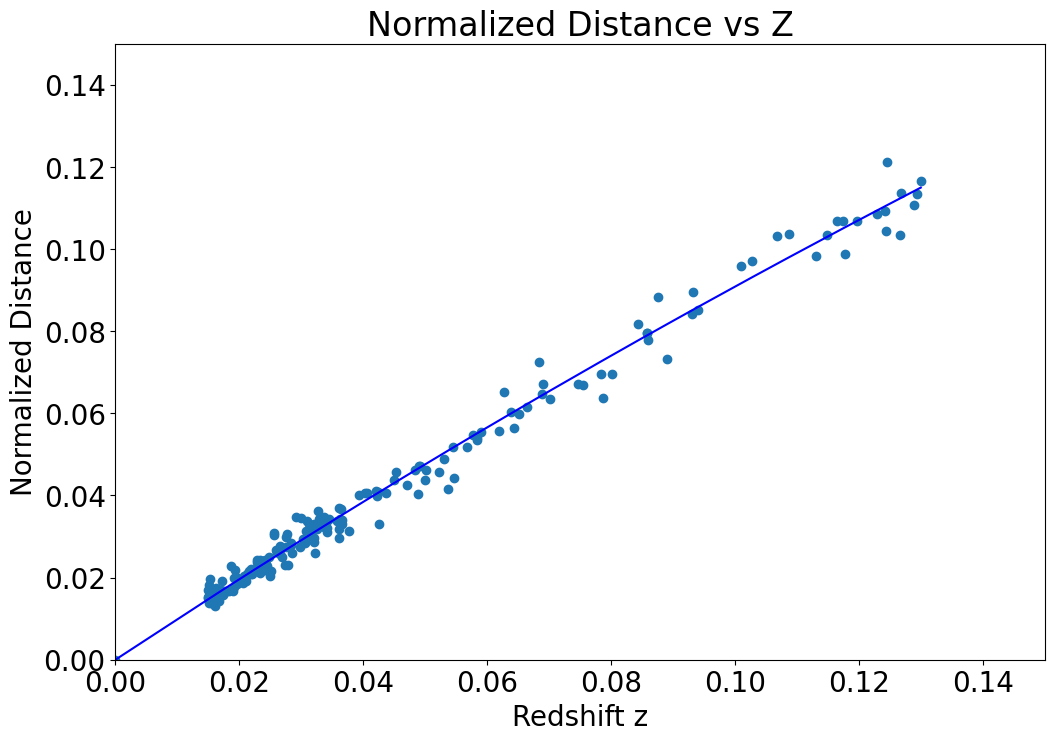

In [5]:

errorf2(res.x)
fig = plt.figure()
ax = plt.gca()
ax.set_ylim([0,0.15])
ax.set_xlim([0,0.15])
ax.scatter(sn1ashort.z, sn1ashort.HU_Fitted)
ax.plot(sn1ashort.z, sn1ashort.HU_distances,'b')
ax.set_ylabel("Normalized Distance")
ax.set_xlabel("Redshift z")
ax.set_title("Normalized Distance vs Z")

Optimization terminated successfully.
         Current function value: 20.170507
         Iterations: 50
         Function evaluations: 102
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 20.17050739879444
             x: [ 1.660e+00]
           nit: 50
          nfev: 102
 final_simplex: (array([[ 1.660e+00],
                       [ 1.660e+00]]), array([ 2.017e+01,  2.017e+01])) 1.659946630829849 69.51189081034244 14.066546173353506 Glyr


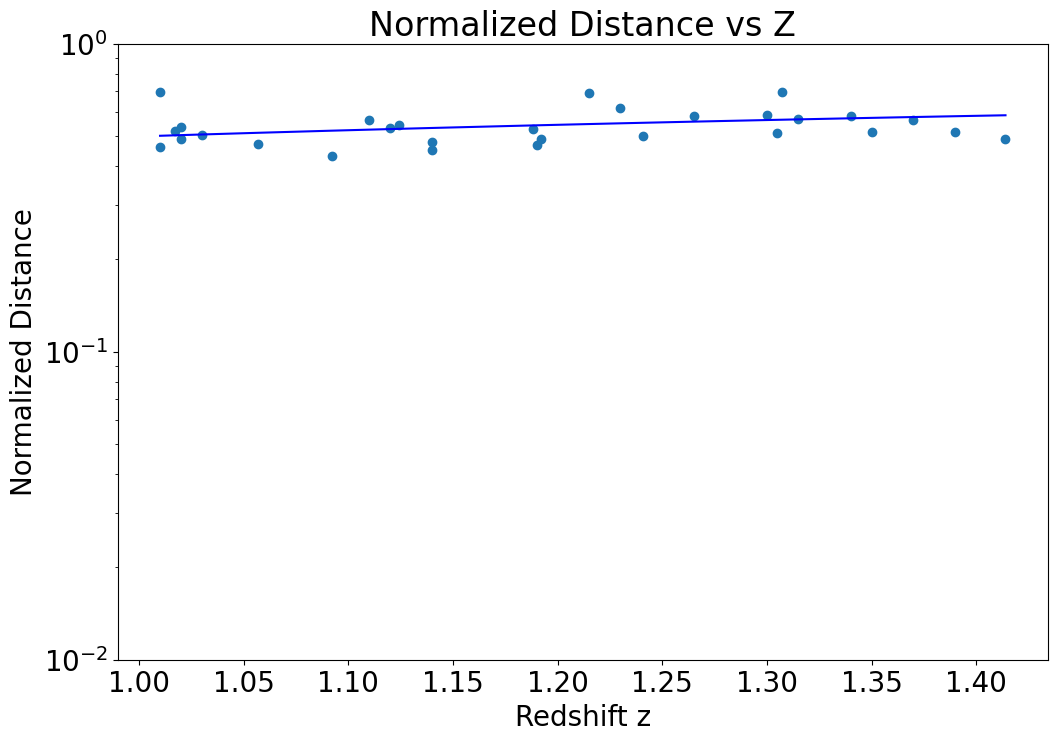

In [6]:
x0=[1.66]
sn1ashort = sn1a[sn1a.z> 1.0].sort_values(by="z")

res = minimize(errorf1, x0, method='nelder-mead',args=[H0],
               options={'xatol': 1e-8, 'disp': True})
fitted=res.x[0]
errorf1(fitted,H0)
R0 = (const.c/(H0*(uu.km/(uu.s*uu.Mpc)))).to("Glyr")
fig = plt.figure()
ax = plt.gca()
# ax.scatter(sn1ashort.z, sn1ashort.HU_Fitted, 'o', c='blue', alpha=0.05, markeredgecolor='none')
ax.scatter(sn1ashort.z, sn1ashort.HU_Fitted)
ax.plot(sn1ashort.z, sn1ashort.HU_distances,'b')
ax.set_ylim([1E-2,1])
ax.set_yscale('log')
ax.set_ylabel("Normalized Distance")
ax.set_xlabel("Redshift z")
ax.set_title("Normalized Distance vs Z")
print(res,fitted, H0, R0)

In [7]:
H0, fitted

(np.float64(69.51189081034244), np.float64(1.659946630829849))

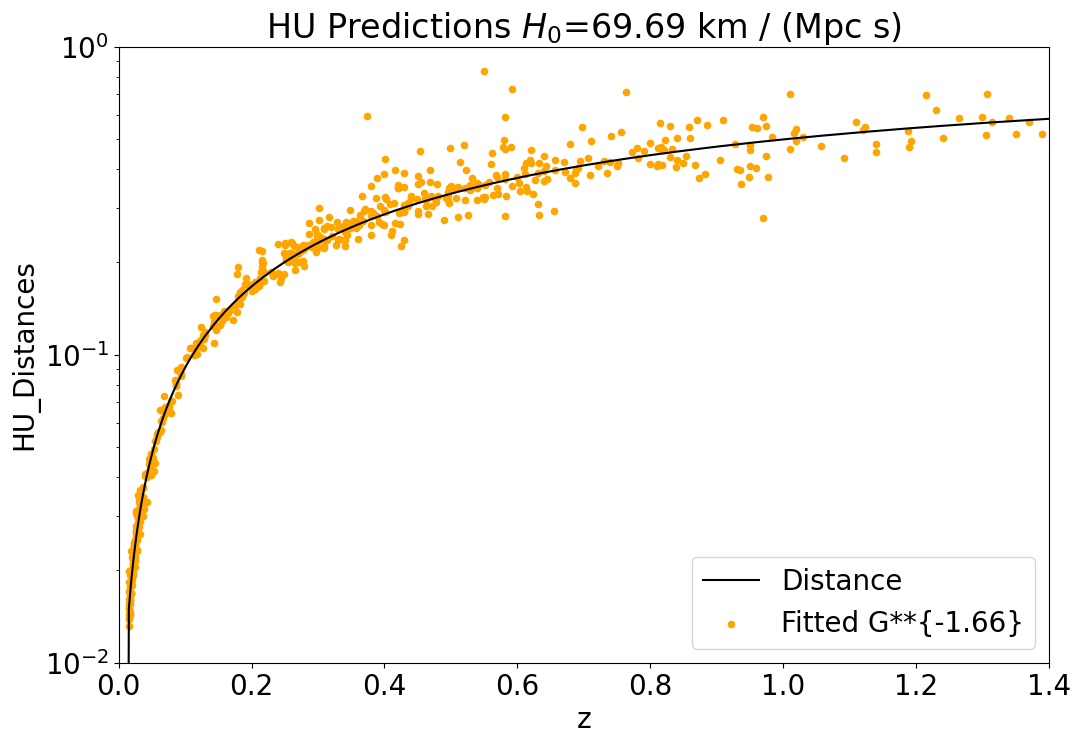

In [8]:
# Plotting
fittedValue=str(fitted).replace(".","")
predictedValue="166"
fittedLegend= 'Fitted G**{-'+"{}".format(np.round(fitted,2)) + '}'

ax= sn1a.plot(y="HU_distances", x="z", color="black", logy=True, ylim=[1E-2,1], xlim=[0,1.4],legend="a")
# ax= sn1a.plot(y="HU_distances", x="z", color="black", logy=False, ylim=[1E-2,0.2], xlim=[0,0.15],legend="a")
sn1a.plot.scatter(y="HU_Fitted", x="z",ax=ax, color="orange",legend="b")
plt.legend(['Distance',fittedLegend],loc='lower right')
plt.ylabel("HU_Distances")
plt.title("HU Predictions $H_0$={}".format(np.round(H_0,2)))

if saveplot:
    fig = ax.get_figure()
    fig.savefig("./HU_long_distances_with_{}_{}.png".format(fittedValue,H0Value))


Text(0.5, 1.0, 'Normalized Distance vs Z')

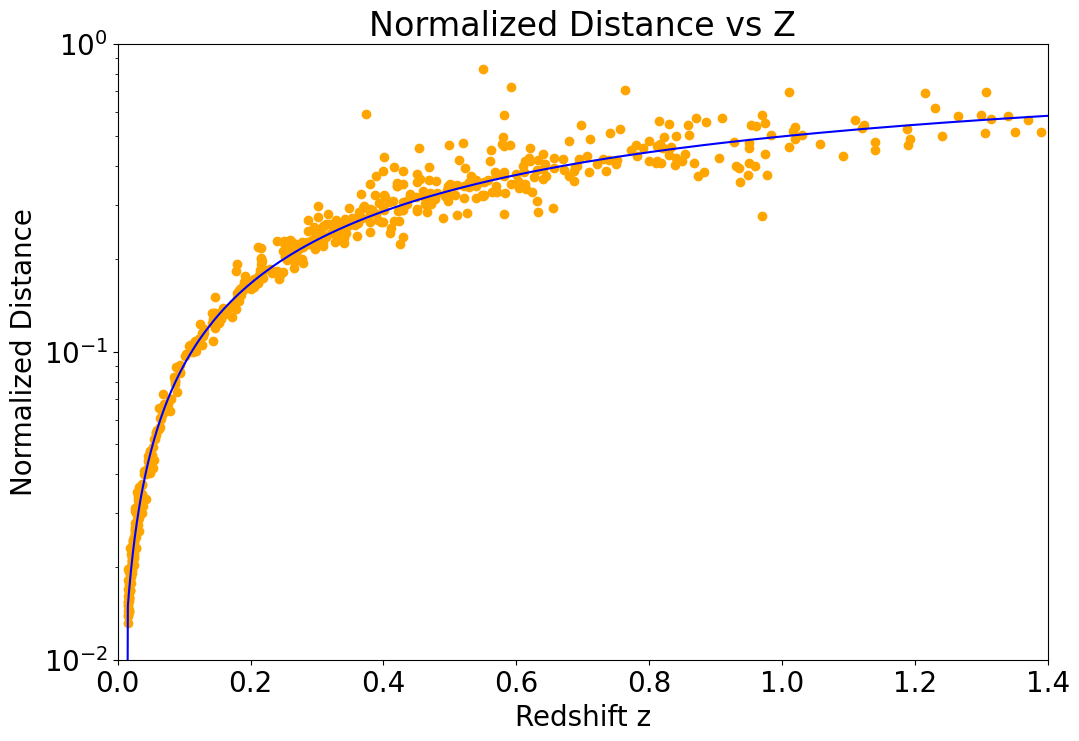

In [9]:
sn1ashort = sn1a[sn1a.z< 1.5].sort_values(by="z")
errorf1(fitted,H0)
fig = plt.figure()
ax = plt.gca()
# ax.scatter(sn1ashort.z, sn1ashort.HU_Fitted, 'o', c='blue', alpha=0.05, markeredgecolor='none')
ax.scatter(sn1ashort.z, sn1ashort.HU_Fitted, c="orange")
ax.plot(sn1ashort.z, sn1ashort.HU_distances,'b')
ax.set_xlim(0,1.4)
ax.set_ylim([1E-2,1])
ax.set_yscale('log')
ax.set_ylabel("Normalized Distance")
ax.set_xlabel("Redshift z")
ax.set_title("Normalized Distance vs Z")

# Proof that HU obeys Hubble Law

# Data file SN1a.txt below. Notice that I added a z=0 line for the integrals to align properly

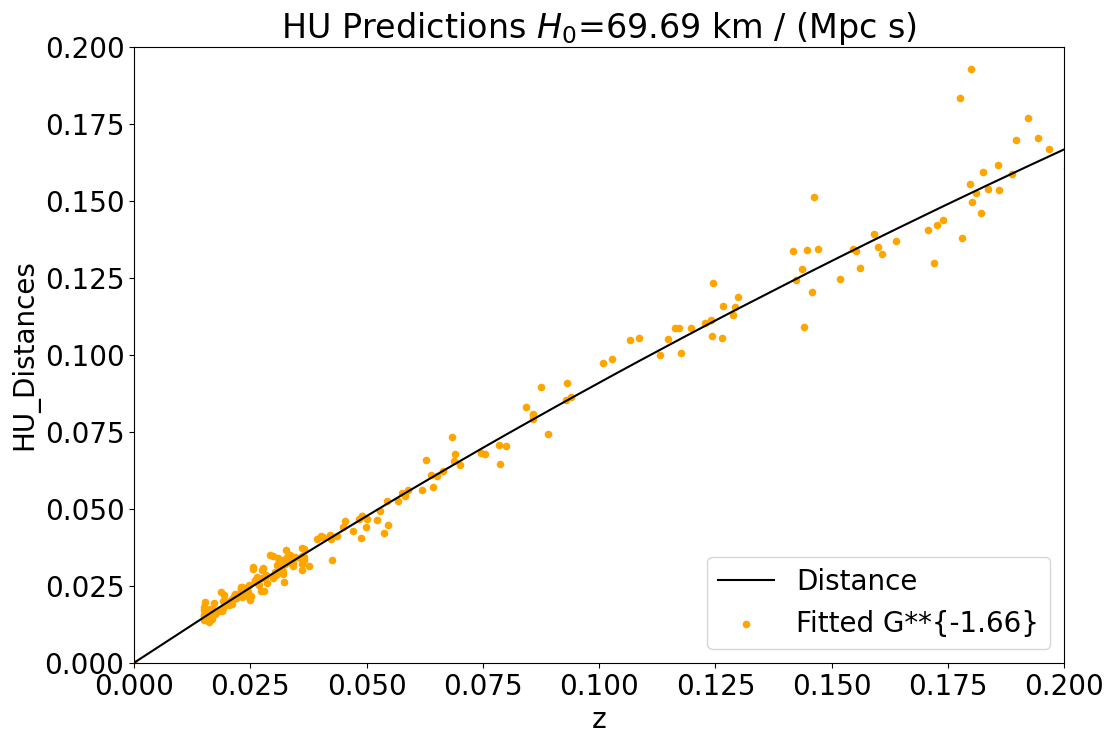

In [10]:
# Plotting
# ax= sn1a.plot(y="HU_distances", x="z", color="black", logy=True, ylim=[1E-2,1], xlim=[0,1.4],legend="a")
ax= sn1a.plot(y="HU_distances", x="z", color="black", logy=False, ylim=[0,0.2], xlim=[0,0.2],legend="a")
sn1a.plot.scatter(y="HU_Fitted", x="z",ax=ax, color="orange",legend="b")
plt.legend(['Distance',fittedLegend],loc='lower right')
plt.ylabel("HU_Distances")
plt.title("HU Predictions $H_0$={}".format(np.round(H_0,2)))

if saveplot:
    fig = ax.get_figure()
    fig.savefig("./HU_short_distances_with_{}_{}.png".format(fittedValue,H0Value))


In [11]:
fitted, H_0

(np.float64(1.659946630829849), <Quantity 69.69411568 km / (Mpc s)>)

# ###########################################################

# FIND THE REAL DISTANCE GIVEN THE CURRENT STELLAR CANDLES DISTANCE

In [12]:

def errorf3(x, distance):
    return (distance-(np.cos(x)-np.sin(x))**(-1.666)*(1-np.cos(x)+np.sin(x)))**2

distance=3.29    
x0=0.3

res = minimize(errorf3, x0, method='nelder-mead',args=[H0],
               options={'xatol': 1e-8, 'disp': True})
fitted=res.x[0]

AgeOfEpoch=(np.cos(fitted)-np.sin(fitted))*R_0
REAl_DISTANCE=(R_0 -AgeOfEpoch).to("Glyr")
COSMOLOGICAL_ANGLE= fitted/np.pi*180
AgeOfEpoch.to("Glyr"),COSMOLOGICAL_ANGLE ,REAl_DISTANCE

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 62


(<Quantity 1.04978143 Glyr>,
 np.float64(41.96709441016562),
 <Quantity 12.97998582 Glyr>)

In [13]:
# Calculate acceleration at Schwarzschild radius for a x Solar Masses Black Hole:

def accBH(M):
    MM=M*const.M_sun
    
    return (const.c**4/(4*MM*const.G)).si

print(accBH(20).to("lyr/h^2"))

1042.225085873119 lyr / h2


# ###########################################################

Text(0.5, 1.0, 'Normalized Distance vs Z')

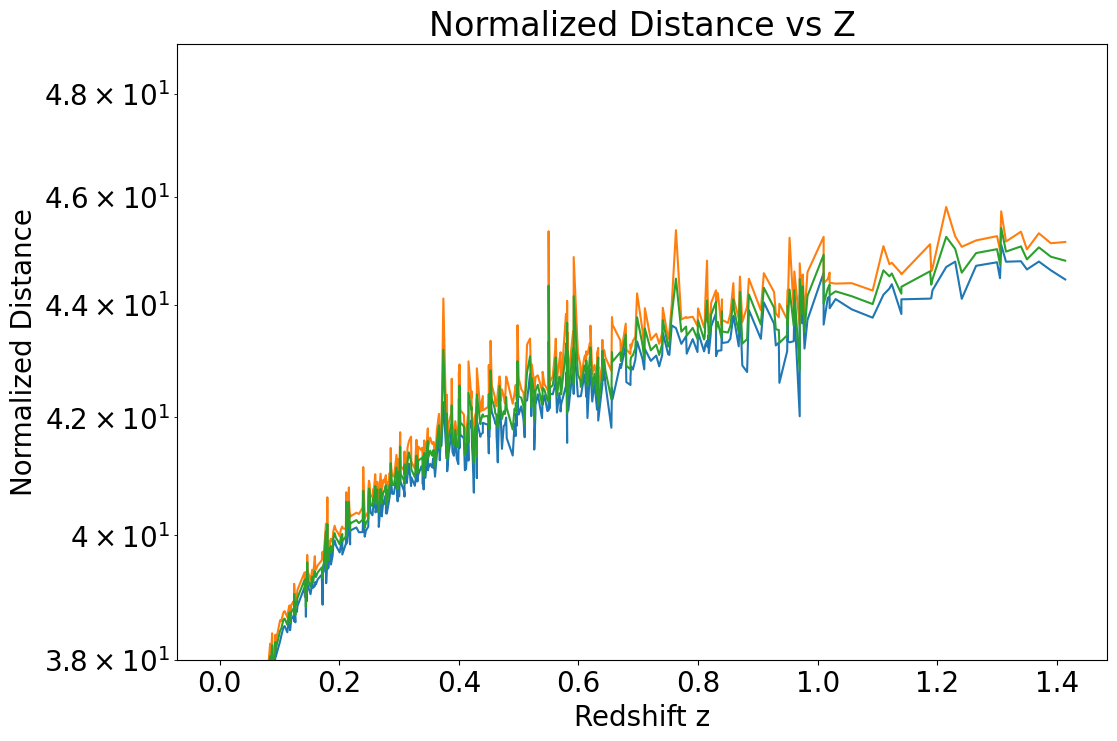

In [14]:
fig = plt.figure()
ax = plt.gca()
plt.plot(sn1a.z, sn1a.m-sn1a.error_m, sn1a.z, sn1a.m+ sn1a.error_m, sn1a.z, sn1a.m)
ax.set_ylim([38,49])
ax.set_yscale('log')
ax.set_ylabel("Normalized Distance")
ax.set_xlabel("Redshift z")
ax.set_title("Normalized Distance vs Z")

In [15]:
#Electron temperature for 0.78 MeV
T=0.78*uu.MeV/(1.5*const.k_B)

In [16]:
T.si

<Quantity 6.03434942e+09 K>

In [17]:
def f(alpha0, val):
    return np.cos(alpha0)-np.sin(alpha0)-val

def fprime(alpha0, val):
    return -np.cos(alpha0)-np.cos(alpha0)

val= 1-10/14
alpha0 =0.0
from scipy.optimize import root_scalar
sol = root_scalar(f,x0=0.5, fprime=fprime,args=val, method='newton')
sol.root, sol.iterations, sol.function_calls




(np.float64(0.5819674207075014), 10, 20)

<Axes: xlabel='dist'>

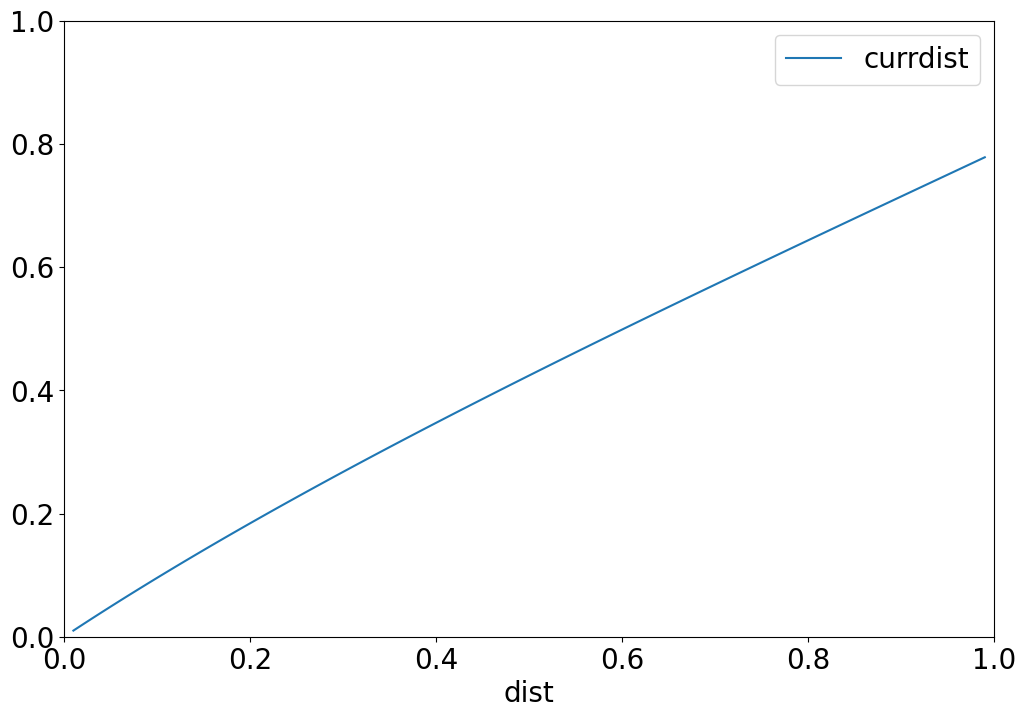

In [18]:
df = pd.DataFrame(np.linspace(0.01,0.99,99),columns=["dist"])
df["radii"]=1 - df.dist
alphas = []
for val in df.radii:
    sol = root_scalar(f,x0=0.5, fprime=fprime,args=val, method='newton')
    alphas.append(sol.root)
df["alphas"]=alphas
df["currdist"]=alphas

# There is no mistake here. The current distance (difference in 4D radii) is, by definition, the optical path of ancient photons
# equal to angle alpha
df.plot(x="dist", y="currdist", xlim=[0,1], ylim=[0,1])    


In [19]:
# Two Plots Predicted
sn1a["alpha"]=np.pi/4-np.arcsin(1/np.sqrt(2)/(1+sn1a.z))
sn1a["HU_distances"]=1-(np.cos(sn1a.alpha)-np.sin(sn1a.alpha))
sn1a["HU_4Dradius"]= np.cos(sn1a.alpha)-np.sin(sn1a.alpha)
sn1a["GFactor"] = sn1a.HU_4Dradius**fitted #fitting
sn1a["HU_Fitted"]=sn1a.distances_obs_normalized *sn1a.GFactor
sn1a["GFactor"] = sn1a.HU_4Dradius**1.5  #parameterless prediction
sn1a["HU_Predicted"]=sn1a.distances_obs_normalized *sn1a.GFactor

# # Plotting
# ax= sn1a.plot(y="HU_distances", x="z", color="black", logy=True, ylim=[1E-2,1], xlim=[0,1.4],legend="a")
# # sn1a.plot.scatter(y="distances_hansSemiClassic_comoving_normalized", x="z",ax=ax, color="blue",legend="b")
# sn1a.plot.scatter(y="HU_Predicted", x="z", ax=ax,  color="orange")
# # plt.legend(['HansOtto_Semiclassical','Fitted G**{-1.55}', 'Predicted G**{-1.5}'],loc='lower right')
# plt.legend(['Distance','Predicted G**{-1.66}'],loc='lower right')
# plt.ylabel("HU_Distances")
# plt.title("HU Predictions $H_0$={}".format(np.round(H_0,2)))

# if saveplot:
#     fig = ax.get_figure()
#     fig.savefig("./HU_distances_TwoPlots{}.png".format(H0Value))
# print("HU Observations Normalized Distances=", sn1a.distances_obs_normalized.max(),"\n"
#       "HU Normalized Distances=", sn1a.HU_distances.max())

In [20]:
df.dist

0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
      ... 
94    0.95
95    0.96
96    0.97
97    0.98
98    0.99
Name: dist, Length: 99, dtype: float64

In [21]:
f(sol.root, val)

np.float64(1.7218004799701703e-11)

In [22]:
def BH_radius(m):  # in solar masses
    BHD=2.37E20*uu.kg/uu.m**3
    return ((3*m*const.M_sun/(4*np.pi*BHD))**(1.0/3)).to("km").round(2)

def Scwarzchild_radius(m): # in solar masses
    return (2*const.G*m*const.M_sun/const.c**2).to("1E9*km").round(2)

def BH_mass(r):
    BHD=2.37E20*uu.kg/uu.m**3
    return ((4/3*np.pi*BHD)*r**3).to("1E9*M_sun").round(2)


In [23]:
print(BH_radius(40E9),Scwarzchild_radius(40E9)), print(BH_mass(const.R_earth)),

4310.98 km 118.13 1e+09 km
129.54 1e+09 solMass


(None, None)